In [1]:
import numpy as np
from IPython.display import Image
from scipy.stats import rankdata
from IPython.core.display import HTML 
from scipy import stats
import warnings
from scipy.special import chdtri
warnings.filterwarnings('ignore')

In [2]:
gamma=0.05

## Завдання 2. Перевірка гіпотези незалежності

## A. `Критерій Хі-квадрат`

In [3]:
Image(url= "https://nsu.ru/mmf/tvims/chernova/ms/lec/img1248.gif")

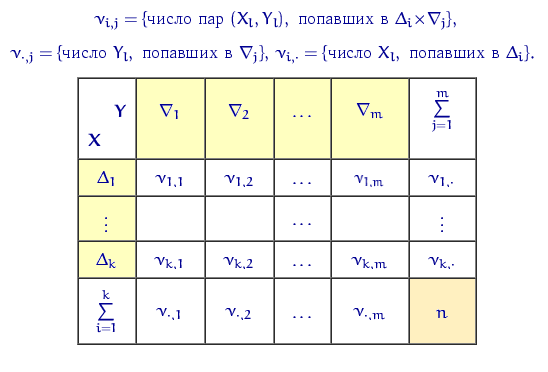

In [35]:
from PIL import Image
im = Image.open("C:/Users/Максим/Desktop/к.PNG")
im

In [21]:
def chi_experiment(distr_1,distr_2):
    n = len(distr_1)
    r = int(10*n/1000)
    k = int(10*n/1000)
    sp_list_r = np.linspace(0,1,r) # розбиваємо на r проміжків
    sp_list_k =  np.linspace(-1,2,k) #  розбиваємо на к проміжків
    
    z_gamma = chdtri((r-1)*(k-1),gamma) # критичне значення
    # матриця ню
    nu_mat = np.zeros((r,k))
    for rt in range(1,r):
        for kt in range(1,k):
            count=0
            for i in range(0,len(distr_1)):
                if sp_list_r[rt-1]<distr_1[i]<sp_list_r[rt] and sp_list_k[kt-1]<distr_2[i]<sp_list_k[kt]:
                    count+=1
        nu_mat[rt][kt] = count
        
    #  рахуємо дельту
    result=[]
    for i in range(0,r):
        for j in range(0,k):
            result.append( (nu_mat[j,i] - np.sum(nu_mat[:,i])*np.sum(nu_mat[j,:])/n )**2/(np.sum(nu_mat[:,i])*np.sum(nu_mat[j,:])) ) 
 
    result = np.array(result)
    result = result[~np.isnan(result)]
    delta = np.sum(result)*n
    
    if delta > z_gamma:# перевірка гіпотези       
        return ['Cуперечить','delta='+str(delta),'z_gamma='+str(z_gamma)]  
    else:        
        return ['Не суперечить','delta='+str(delta),'z_gamma='+str(z_gamma)] 

Перевірка для різних n

In [45]:
for n in [500,5000,50000]:
    print('n=',n,'r=k=',10*n/1000)

n= 500 r=k= 5.0
n= 5000 r=k= 50.0
n= 50000 r=k= 500.0


In [22]:
for n in [500,5000,50000]:
    ksi = np.random.uniform(0,1,n)
    etta = np.random.uniform(-1,1,n)
    X = ksi
    Y = ksi + etta
    print('n=',n,chi_experiment(X,Y))

n= 500 ['Cуперечить', 'delta=376.71200000000005', 'z_gamma=26.296227604864242']
n= 5000 ['Cуперечить', 'delta=4986.009800000001', 'z_gamma=2516.10819332539']
n= 50000 ['Cуперечить', 'delta=496328.0076000004', 'z_gamma=250162.89689565956']


## В. `Критерій Спірмена`

In [25]:
def spearman_experiment(distr_1,distr_2):
    R,S = rankdata(distr_1),rankdata(distr_2)# ранги
    ro_n = abs(1 - (6/(n*(n**2-1)))*np.sum((R-S)**2))# коеф.кореляції
    
    z_gamma = stats.norm.ppf(1-(gamma/2))/np.sqrt(n)# критичне значення
    
    if ro_n > z_gamma:# перевірка гіпотези       
        return ['Cуперечить','ro_n='+str(ro_n),'z_gamma='+str(z_gamma)]  
    else:        
        return ['Не суперечить','ro_n='+str(ro_n),'z_gamma='+str(z_gamma)] 

Перевірка для різних n

In [26]:
for n in [500,5000,50000]:
    ksi = np.random.uniform(0,1,n)
    etta = np.random.uniform(-1,1,n)
    X = ksi
    Y = ksi + etta
    print('n=',n,spearman_experiment(X,Y))

n= 500 ['Cуперечить', 'ro_n=0.3873537734150937', 'z_gamma=0.08765225405765815']
n= 5000 ['Cуперечить', 'ro_n=0.44712830047713203', 'z_gamma=0.027718076486993554']
n= 50000 ['Cуперечить', 'ro_n=0.42123470743354985', 'z_gamma=0.008765225405765815']


## С. `Критерій Кендалла`

In [39]:
def kendall_experiment(distr_1,distr_2):
    n= len(distr_1)
    R,S = rankdata(distr_1),rankdata(distr_2)# ранги
    RS = np.stack((R,S)).T# пари рангів
    sorted_dict = dict(sorted(dict(RS).items()))
    iv = np.array(list(sorted_dict.items())).astype('int64')# масив (і,V)
    # рахуємо N
    z_gamma = 2*stats.norm.ppf(1-(gamma/2))/(3*np.sqrt(n)) # критичне значення
    h= 0
    for i in range(0,n):
        for j in range(0,n):
            if iv[i][1]<iv[j][1] and i<j:
                h+=1            
    tau_n = abs(4*h/(n*(n-1))-1)    
    if tau_n > z_gamma:# перевірка гіпотези       
        return ['Cуперечить','tau_n='+str(tau_n),'z_gamma='+str(z_gamma)]  
    else:        
        return ['Не суперечить','tau_n='+str(tau_n),'z_gamma='+str(z_gamma)] 

Перевірка для різних n

In [40]:
for n in [500,5000,50000]:
    ksi = np.random.uniform(0,1,n)
    etta = np.random.uniform(-1,1,n)
    X = ksi
    Y = ksi + etta
    print('n=',n,kendall_experiment(X,Y))

n= 500 ['Cуперечить', 'tau_n=0.3012745490981963', 'z_gamma=0.05843483603843876']
n= 5000 ['Cуперечить', 'tau_n=0.29181932386477305', 'z_gamma=0.018478717657995705']
n= 50000 ['Cуперечить', 'tau_n=0.2655791561384387', 'z_gamma=0.005843483603843878']
